created by: Aslamic Adika

# Project 1

In [299]:
#libraries 

import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from pandas.core.tools.datetimes import to_datetime
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [300]:
dfo = pd.read_csv(r'C:\Users\win10\Documents\ASLAMIC\01Project\Portfolio\Project_1\Dataset_1\orders_dataset.csv')
dfc = pd.read_csv(r'C:\Users\win10\Documents\ASLAMIC\01Project\Portfolio\Project_1\Dataset_1\customers_dataset.csv')
dfp = pd.read_csv(r'C:\Users\win10\Documents\ASLAMIC\01Project\Portfolio\Project_1\Dataset_1\order_payments_dataset.csv')
dictionary = pd.read_csv(r'C:\Users\win10\Documents\ASLAMIC\01Project\Portfolio\Project_1\Dataset_1\Data Dictionary.csv')

Data frame dfo dan dfp memiliki satu kolom unik yang sama, sehingga dapat digunakan untuk menggabungkan kedua data frame. Dua data frame yang telah digabung dinamakan df1.

In [301]:
df1 = dfo.merge(dfp, how = 'left', left_on = 'order_id',right_on = 'order_id')

Periksa semua kolom di df1

In [302]:
df1.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')

Telah kita pastikan bahwa dua data frame telah bergabung karena semua kolom baik di dfo dan dfp berada pada satu data frame df1. Data frame yang telah digabung dinamai dff

Gabung df1 dan dfc, kolom *customer_id* adalah kolom unik yang dimiliki kedua data frame

In [303]:
dff = df1.merge(dfc, how = 'left',left_on = 'customer_id', right_on = 'customer_id')

Periksa semua kolom yang ada di dff

In [304]:
dff.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

Semua kolom sudah berada pada satu data frame dff. dff adalah dataframe final.

Periksa data null/NaN pada dff

<AxesSubplot:>

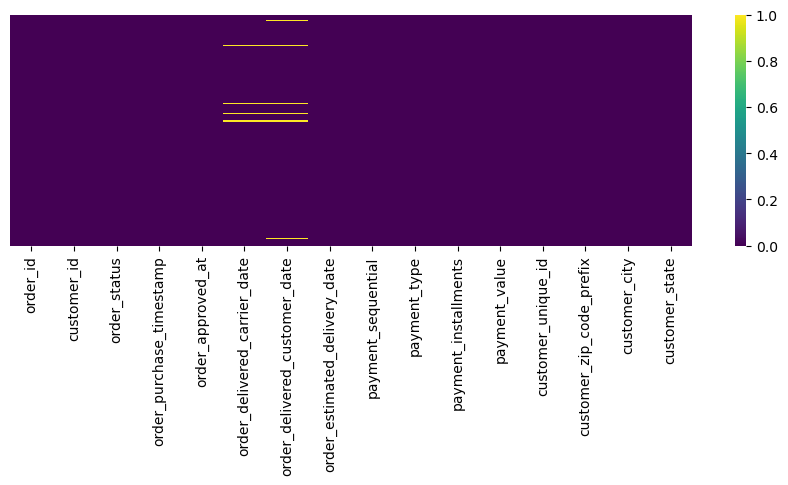

In [305]:
plt.figure(figsize=(11,3))
sns.heatmap(dff.isna(), yticklabels = False, cbar= True, cmap='viridis') 

Terdapat beberapa kolom yang memiliki data null/NaN yang ditandai oleh garis kuning.

Kita salin data mentah dff untuk membuat data frame yang akan dibersihkan. Kita namakan dff_bersih sebagai data frame yang akan dibersihkan

In [306]:
dff_bersih = dff.copy()

Hapus baris yang memiliki data null/NaN pada setiap kolom

In [307]:
dff_bersih.dropna(axis = 0,inplace = True)

Periksa total data null/NaN pada setiap 

<AxesSubplot:>

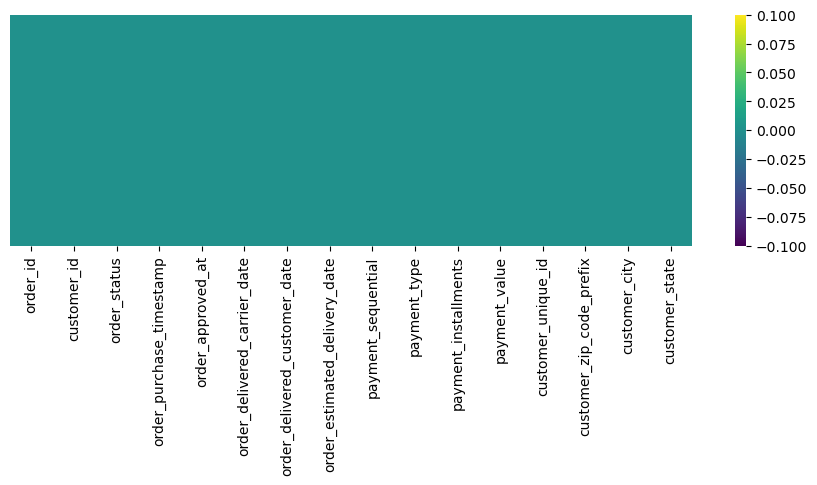

In [308]:
plt.figure(figsize=(11,3))
sns.heatmap(dff_bersih.isna(), cmap='viridis', yticklabels=False, cbar = True)

Now we have a clean data frame that free from null/NaN value

Periksa informasi kolom data frame dff_bersih

In [309]:
dff_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100739 non-null  object 
 1   customer_id                    100739 non-null  object 
 2   order_status                   100739 non-null  object 
 3   order_purchase_timestamp       100739 non-null  object 
 4   order_approved_at              100739 non-null  object 
 5   order_delivered_carrier_date   100739 non-null  object 
 6   order_delivered_customer_date  100739 non-null  object 
 7   order_estimated_delivery_date  100739 non-null  object 
 8   payment_sequential             100739 non-null  float64
 9   payment_type                   100739 non-null  object 
 10  payment_installments           100739 non-null  float64
 11  payment_value                  100739 non-null  float64
 12  customer_unique_id            

Konversikan tipe data yang diperlukan (dalam hal ini tipe data object menjadi timeseries)

In [310]:
for i in dff_bersih.columns[3:8]:
   dff_bersih[i] = to_datetime(dff_bersih[i])

Dari code di atas, kita namakan data frame terbaru dff_bersih

Periksa informasi data frame dff_bersih

In [311]:
dff_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100739 non-null  object        
 1   customer_id                    100739 non-null  object        
 2   order_status                   100739 non-null  object        
 3   order_purchase_timestamp       100739 non-null  datetime64[ns]
 4   order_approved_at              100739 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100739 non-null  datetime64[ns]
 6   order_delivered_customer_date  100739 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100739 non-null  datetime64[ns]
 8   payment_sequential             100739 non-null  float64       
 9   payment_type                   100739 non-null  object        
 10  payment_installments           100739 non-null  float64       
 11  

Periksa kolom yang seharusnya tidak memiliki nilai duplikat

In [312]:
for i in dff_bersih.columns[0:2]:
  print(f'total duplikat kolom {i} = ', dff[i].duplicated().sum())

total duplikat kolom order_id =  4446
total duplikat kolom customer_id =  4446


Bersihkan setiap baris yang memiliki nilai duplikat

In [313]:
dff_bersih_dup = dff_bersih.drop_duplicates(subset = 'order_id')


Periksa baris yang memiliki nilai duplikat

In [314]:
for i in dff_bersih_dup.columns[0:2]:
   print(f'total duplikat kolom {i} = ', dff_bersih_dup[i].duplicated().sum())
 


total duplikat kolom order_id =  0
total duplikat kolom customer_id =  0


Terlihat bahwa kolom 'order_id' dan kolom 'customer_id' sudah tidak memiliki nilai duplikat pada setiap barisnya

Bersihkan kembali kolom yang seharusnya bebas dari nilai duplikat

In [315]:
dff1 = dff_bersih_dup.drop_duplicates(subset = 'customer_unique_id')

Sekarang, kolom yang sudah bersih dari duplikat dan null/NaN kita namakan dff1

Periksa nilai duplikat pada setiap kolom

In [316]:
for i in dff1.columns[0:]:
   print(f'total duplikat kolom {i} = ', dff1[i].duplicated().sum())

total duplikat kolom order_id =  0
total duplikat kolom customer_id =  0
total duplikat kolom order_status =  93339
total duplikat kolom order_purchase_timestamp =  247
total duplikat kolom order_approved_at =  7714
total duplikat kolom order_delivered_carrier_date =  15598
total duplikat kolom order_delivered_customer_date =  749
total duplikat kolom order_estimated_delivery_date =  92900
total duplikat kolom payment_sequential =  93327
total duplikat kolom payment_type =  93337
total duplikat kolom payment_installments =  93317
total duplikat kolom payment_value =  66141
total duplikat kolom customer_unique_id =  0
total duplikat kolom customer_zip_code_prefix =  78462
total duplikat kolom customer_city =  89257
total duplikat kolom customer_state =  93314


Terlihat bahwa kolom 'order_id', 'customer_id', dan 'customer_unique_id' sudah tidak memiliki baris yang nilainya duplikat

Periksa dimensi data frame dff1

In [317]:
dff1.shape

(93341, 16)

dataframe bersih kita, dff1, memiliki 93341 baris dan 16 kolom

Lihat data teratas pada data frame

In [318]:
dff1.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.000,credit_card,1.000,18.120,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.000,boleto,1.000,141.460,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.000,credit_card,3.000,179.120,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.000,credit_card,1.000,72.200,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN


Ubah nama kota pada kolom 'customer_city' menjadi huruf kapital pada setiap awal kata

In [319]:
dff1['customer_city'] = dff1['customer_city'].str.title()

Periksa nilai unik pada kolom 'customer_city'

In [320]:
dff1['customer_city'].unique()

array(['Sao Paulo', 'Barreiras', 'Vianopolis', ..., 'Messias Targino',
       'Campo Do Tenente', 'Nova Vicosa'], dtype=object)

In [321]:
for i in dff1:
  unique = dff1[i].value_counts()
  print(unique, '\n')

e481f51cbdc54678b7cc49136f2d6af7    1
f0fa751754bd0d673e3eb5563ccc9d41    1
ac5269d6717b84efd17d253cf5520652    1
1764739dbac867a8d361a7694d05f69a    1
fd1aab20092cfd4201ea21ed4e847135    1
                                   ..
5b3eecddd7b10744360abfff7a6a74a4    1
a427db09dd194740f13a3a2c7bcf38bc    1
0b2a43ec15f983f589ecd097455b283d    1
e9ab3fdd8251492add1d9ccc054c8b4a    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: order_id, Length: 93341, dtype: int64 

9ef432eb6251297304e76186b10a928d    1
3cbaff1f3ace2b01fcd056100953ff6f    1
21d029fb9127856d43d8c335e486b404    1
f85c84778033505977181ec858c3c07e    1
e87cbcfd281a4e4923ee3b2c9e6e9016    1
                                   ..
45c76559b2c80c41022e3c6877a49a4a    1
35db0c2edcd70d3ebd5cdc04b009ae38    1
9a73612485c1eaf2ea1e2b46d3890cb8    1
6ebeb2d4900ac11ccaefd4071e0507fe    1
edb027a75a1449115f6b43211ae02a24    1
Name: customer_id, Length: 93341, dtype: int64 

delivered    93335
canceled         6
Name: order_status, dtype: int6

Untuk keperluan perhitungan lebih jauh, kolom *customer_zip_code_prefix* diperlakukan sebagai object alih-alih sebagai integer

Konversi tipe data 'customer_zip_code_prefix' menjadi tipe data object

In [322]:
dff1['customer_zip_code_prefix'] = dff1['customer_zip_code_prefix'].astype(object)

Periksa informasi data frame dff1

In [323]:
dff1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93341 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93341 non-null  object        
 1   customer_id                    93341 non-null  object        
 2   order_status                   93341 non-null  object        
 3   order_purchase_timestamp       93341 non-null  datetime64[ns]
 4   order_approved_at              93341 non-null  datetime64[ns]
 5   order_delivered_carrier_date   93341 non-null  datetime64[ns]
 6   order_delivered_customer_date  93341 non-null  datetime64[ns]
 7   order_estimated_delivery_date  93341 non-null  datetime64[ns]
 8   payment_sequential             93341 non-null  float64       
 9   payment_type                   93341 non-null  object        
 10  payment_installments           93341 non-null  float64       
 11  payment_value 

Terlihat semua kolom sudah memiliki tipe data yang diinginkan

Periksa kolom yang memiliki tipe data float atau integer

In [324]:
for i,j in enumerate(dff1.keys()):
  if dff1[j].dtype == float or dff1[j].dtype == int :
    print(f'Column {j} is either float or integer data')

Column payment_sequential is either float or integer data
Column payment_installments is either float or integer data
Column payment_value is either float or integer data


Hapus kolom tidak relevan

In [325]:
df = dff1.drop(columns=['customer_zip_code_prefix'])

## EDA

Periksa kembali data

In [326]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.000,credit_card,1.000,18.120,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.000,boleto,1.000,141.460,af07308b275d755c9edb36a90c618231,Barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.000,credit_card,3.000,179.120,3a653a41f6f9fc3d2a113cf8398680e8,Vianopolis,GO
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.000,credit_card,1.000,72.200,7c142cf63193a1473d2e66489a9ae977,Sao Goncalo Do Amarante,RN
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.000,credit_card,1.000,28.620,72632f0f9dd73dfee390c9b22eb56dd6,Santo Andre,SP


Periksa data outlier dengan menggunakan boxplot

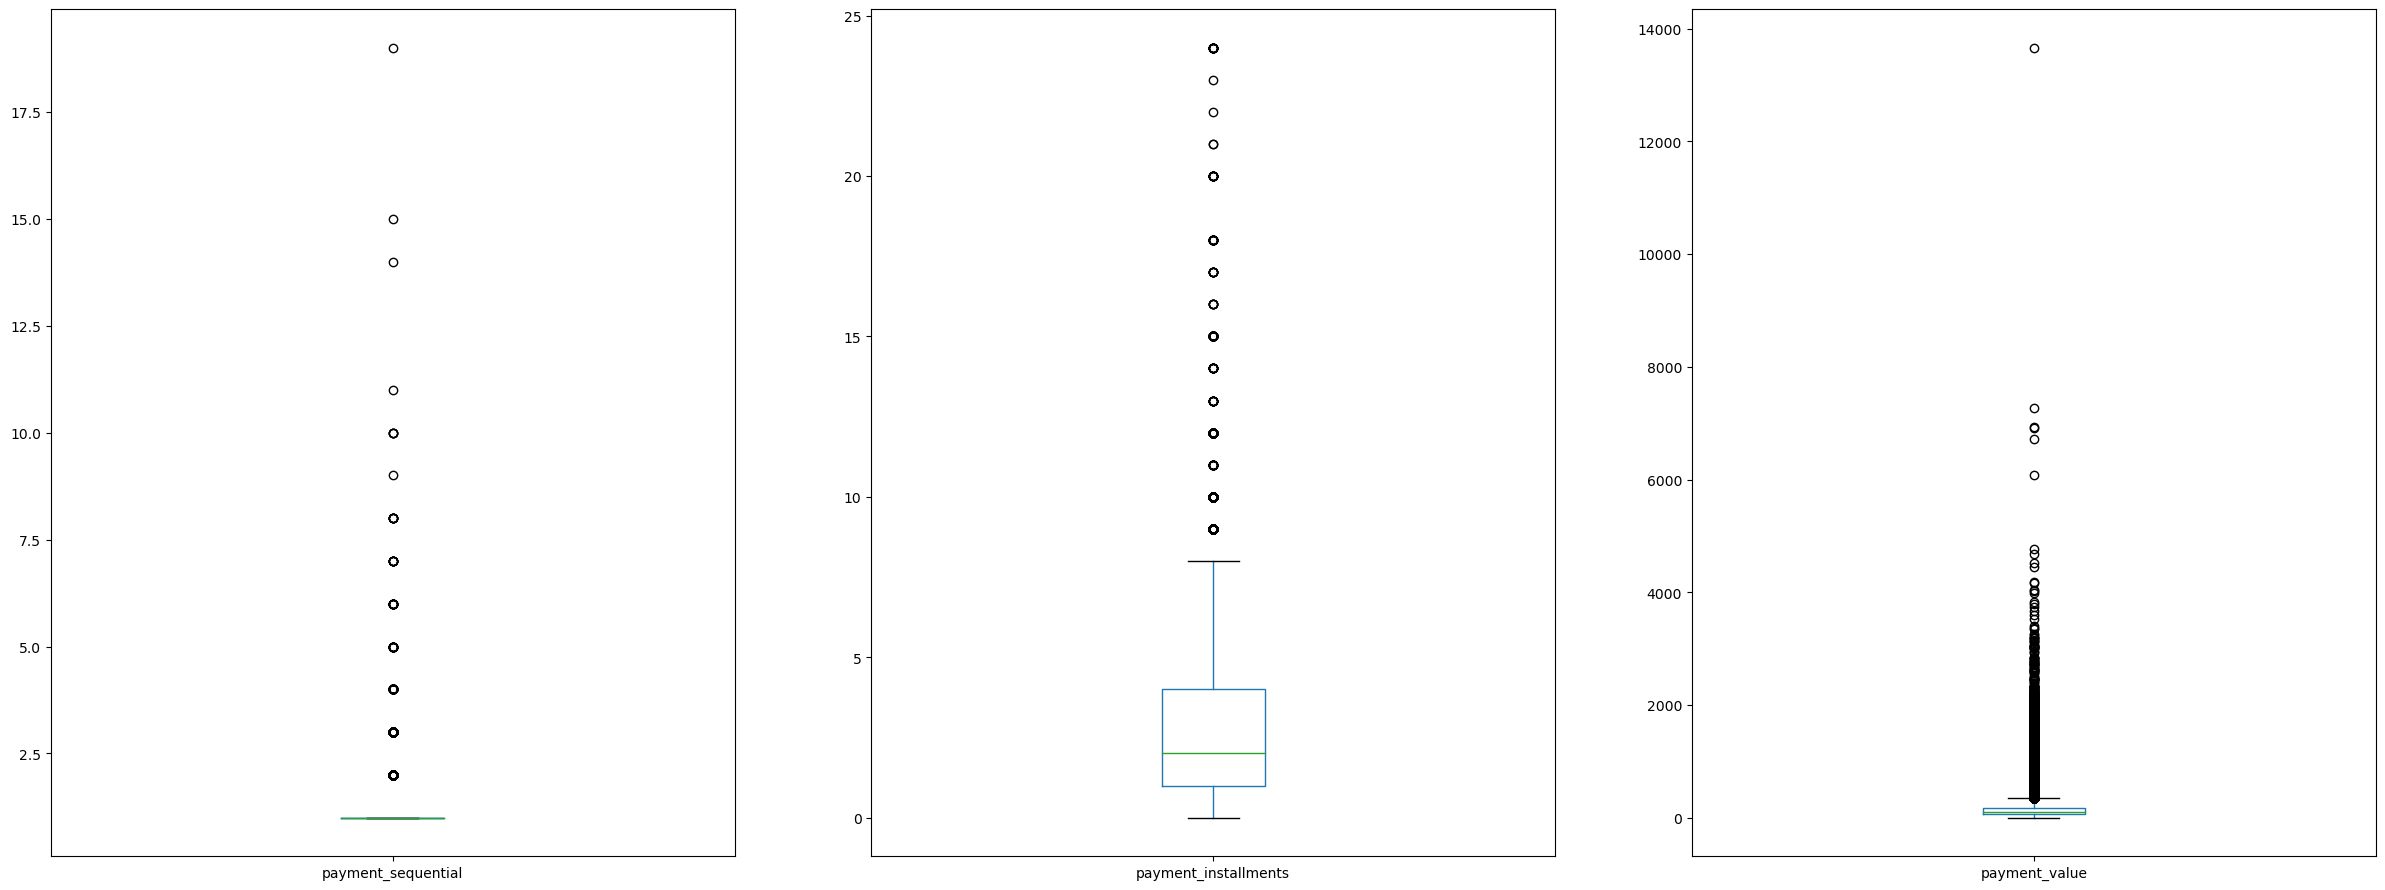

In [327]:
def plotbox(data):
  num = list()
  for j in data.columns:
    if data[j].dtype == float or data[j].dtype == int :
      num.append(j)
  fig, axes = plt.subplots(nrows=1, ncols=len(num),figsize=(30,11))
  for k,l in enumerate(num):
    a = data.boxplot(l, ax=axes.flatten()[k],grid=False)
  return plt.show()
  
#plot box data frame dff1!
plotbox(dff1)

Data yang relevan untuk dibuang outliernya adalah kolom 'payment_value'.

Sekarang, kita buang outliernya dan buat data frame baru yang bersih dari outlier, kita namakan dff2. 

In [328]:
a = df['payment_value'].describe()
b = a['25%']-(1.5*(a['75%']-a['25%']))
c = a['75%']+(1.5*(a['75%']-a['25%'])) #batas atas
#  #data tanpa outlier
df = df[~(df['payment_value']>c)]

df merupakan data frame yang sudah bebas outlier.



In [329]:
df.shape

(86081, 15)

In [330]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.000,credit_card,1.000,18.120,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.000,boleto,1.000,141.460,af07308b275d755c9edb36a90c618231,Barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.000,credit_card,3.000,179.120,3a653a41f6f9fc3d2a113cf8398680e8,Vianopolis,GO
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.000,credit_card,1.000,72.200,7c142cf63193a1473d2e66489a9ae977,Sao Goncalo Do Amarante,RN
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.000,credit_card,1.000,28.620,72632f0f9dd73dfee390c9b22eb56dd6,Santo Andre,SP


In [331]:
df['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [332]:
df.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.000,credit_card,1.000,18.120,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP


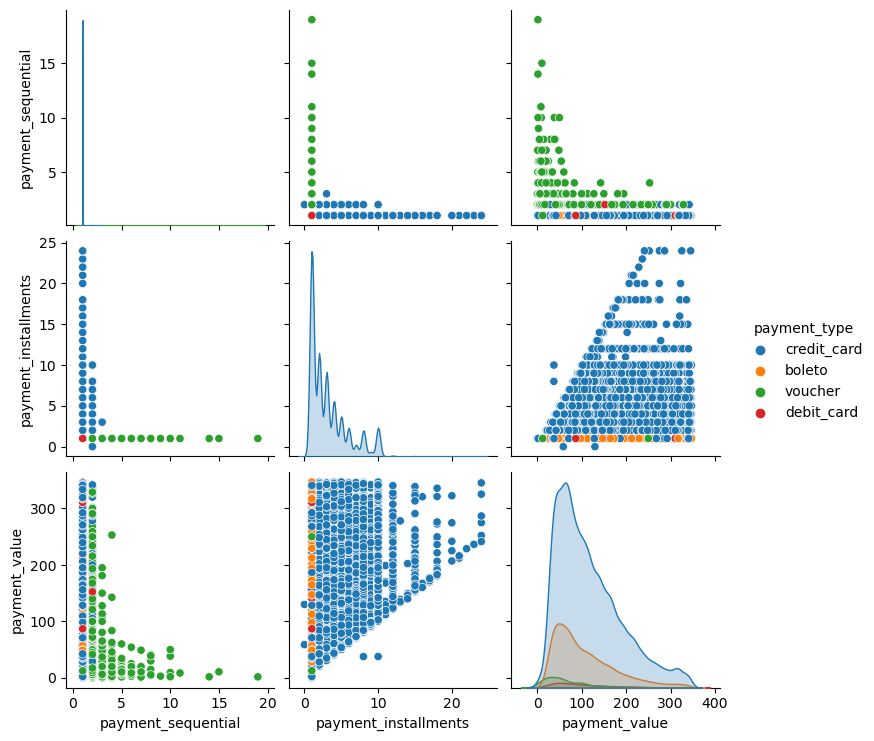

In [333]:
sns.pairplot(df, hue='payment_type')

Pairplot hanya akan menggunakan numerical value. Ini langkah cepat untuk melihat relasi antar kolom (dengan data numeric)

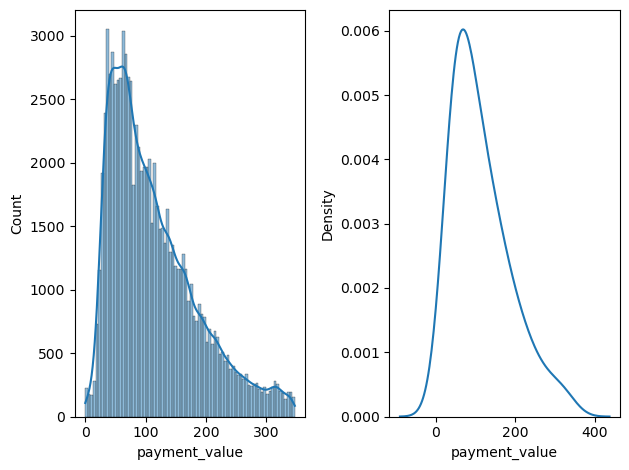

In [334]:
fig, ax = plt.subplots(1,2)
sns.histplot(df['payment_value'], kde= True, ax = ax[0])
sns.kdeplot(df['payment_value'], bw_adjust=4, ax = ax[1])
plt.tight_layout()
plt.show()

In [335]:
df.payment_value.mean()

113.34794507498101

transformation payment value menjadi bentuk nilai logaritmik agar distribusi menjadi gaussian.

In [336]:
df['log_payment_value'] = np.log10(df.payment_value)

In [337]:
df.log_payment_value.mean()

1.9597480209339304

In [338]:
10**(df.log_payment_value.mean())

91.14818411889

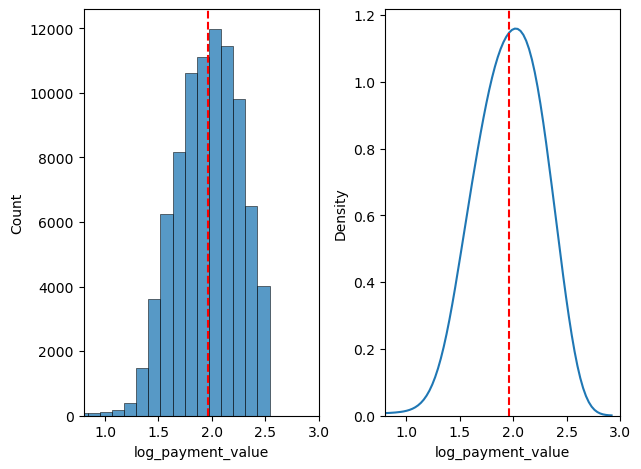

In [339]:
fig, ax = plt.subplots(1,2)
sns.histplot(df['log_payment_value'], bins =40 ,kde= False, ax = ax[0])
sns.kdeplot(df['log_payment_value'],bw_adjust=4,  ax = ax[1])
plt.tight_layout()
ax[0].set_xlim((0.8,3))
ax[0].axvline(x=df.log_payment_value.mean(),
            linestyle= '--',
            color='red')
ax[1].axvline(x=df.log_payment_value.mean(),
            linestyle= '--',
            color='red')
ax[1].set_xlim((0.8,3))
plt.show()

Distribusi payment_value. Kurva KDE membentuk positive skew (median lebih kecil dari mean).

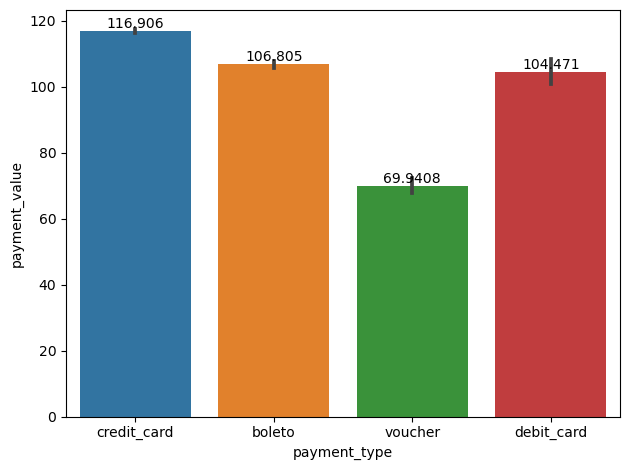

In [340]:
payment_type_bar = sns.barplot(x = 'payment_type',y = 'payment_value',data = df, estimator=np.mean)
for i in payment_type_bar.containers:
    payment_type_bar.bar_label(i,)
plt.tight_layout()

In [341]:
data_pembayaran = df['payment_value'].groupby(df['payment_type']).agg('mean').reset_index(name='payment_value').sort_values(by = 'payment_value', ascending = False)

Distribusi rata-rata besar pembayaran pada setiap metode pembayaran.

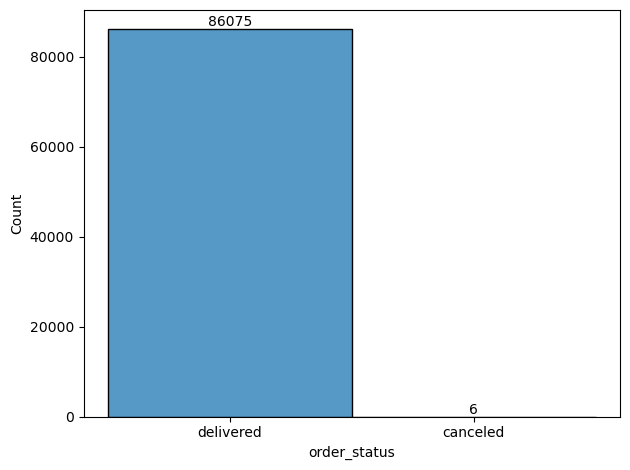

In [342]:
x = sns.histplot(df['order_status'])
for i in x.containers:
    x.bar_label(i,)
plt.tight_layout()

Order selalu delivered!

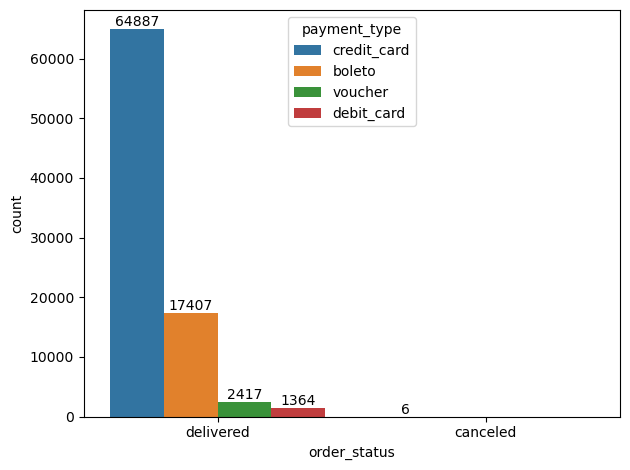

In [343]:
x = sns.countplot(x='order_status', data= df, hue='payment_type')
for i in x.containers:
    x.bar_label(i,)
plt.tight_layout()

Distribusi order delivered setiap metode pembayaran.

## Data Agregation

In [344]:
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,log_payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.000,credit_card,1.000,18.120,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,1.258
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.000,boleto,1.000,141.460,af07308b275d755c9edb36a90c618231,Barreiras,BA,2.151
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.000,credit_card,3.000,179.120,3a653a41f6f9fc3d2a113cf8398680e8,Vianopolis,GO,2.253


In [345]:
number_order = df['order_id'].groupby(df['customer_city']).count().reset_index(name='total_order')
number_order

,customer_city,total_order
0,Abadia Dos Dourados,3
1,Abaete,10
2,Abaetetuba,7
3,Abaiara,2
4,Abaira,2
...,...,...
3959,Xinguara,8
3960,Xique-Xique,3
3961,Zacarias,2
3962,Ze Doca,4


In [346]:
df['Year-Month_Order'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m'))

In [347]:
df['Year_Order'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y'))

In [348]:
df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,log_payment_value,Year-Month_Order,Year_Order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.000,credit_card,1.000,18.120,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,1.258,2017-10,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.000,boleto,1.000,141.460,af07308b275d755c9edb36a90c618231,Barreiras,BA,2.151,2018-07,2018


In [349]:
total_order_year_month = df['order_id'].groupby(df['Year-Month_Order']).agg('count').reset_index(name='total_order')
total_order_year_month.head(3)

,Year-Month_Order,total_order
0,2016-10,230
1,2016-12,1
2,2017-01,611


In [350]:
total_order_year_month.loc[0.5] = ['2016-11', 0]
total_order_year_month = total_order_year_month.sort_index().reset_index(drop=True)

In [351]:
total_order_year_month.head(3)

,Year-Month_Order,total_order
0,2016-10,230
1,2016-11,0
2,2016-12,1


In [352]:
# Function to insert row in the dataframe
def Insert_row(row_number, df, row_value):
	# Starting value of upper half
	start_upper = 0

	# End value of upper half
	end_upper = row_number

	# Start value of lower half
	start_lower = row_number

	# End value of lower half
	end_lower = df.shape[0]

	# Create a list of upper_half index
	upper_half = [*range(start_upper, end_upper, 1)]

	# Create a list of lower_half index
	lower_half = [*range(start_lower, end_lower, 1)]

	# Increment the value of lower half by 1
	lower_half = [x.__add__(1) for x in lower_half]

	# Combine the two lists
	index_ = upper_half + lower_half

	# Update the index of the dataframe
	df.index = index_

	# Insert a row at the end
	df.loc[row_number] = row_value

	# Sort the index labels
	df = df.sort_index()

	# return the dataframe
	return df

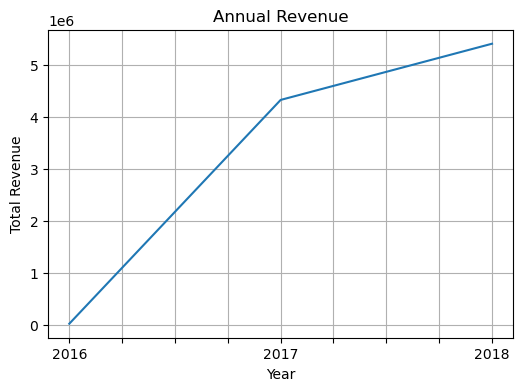

In [353]:
#Annual Revenue
plt.figure(figsize=(6,4))
df.groupby(['Year_Order'])['payment_value'].agg('sum').plot()
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Annual Revenue')
plt.grid(True)
plt.show()

In [354]:
total_value_year_month = df['payment_value'].groupby(df['Year-Month_Order']).agg('sum').reset_index(name='total_value')
total_value_year_month.head(3)

,Year-Month_Order,total_value
0,2016-10,26859.070
1,2016-12,19.620
2,2017-01,67136.910


In [355]:
# Let's create a row which we want to insert
row_number = 1
row_value = ['2016-11', 0]


if row_number > total_value_year_month.index.max()+1:
	print("Invalid row_number")
else:
	
	# Let's call the function and insert the row
	# at the second position
	total_value_year_month = Insert_row(row_number, total_value_year_month, row_value)


In [356]:
# Let's create a row which we want to insert
row_number = 1
row_value = ['2016-11', 0]


if row_number > total_order_year_month.index.max()+1:
	print("Invalid row_number")
else:
	
	# Let's call the function and insert the row
	# at the second position
	total_order_year_month = Insert_row(row_number, total_order_year_month, row_value)

In [357]:
total_value_year_month.head(3)

,Year-Month_Order,total_value
0,2016-10,26859.070
1,2016-11,0.000
2,2016-12,19.620


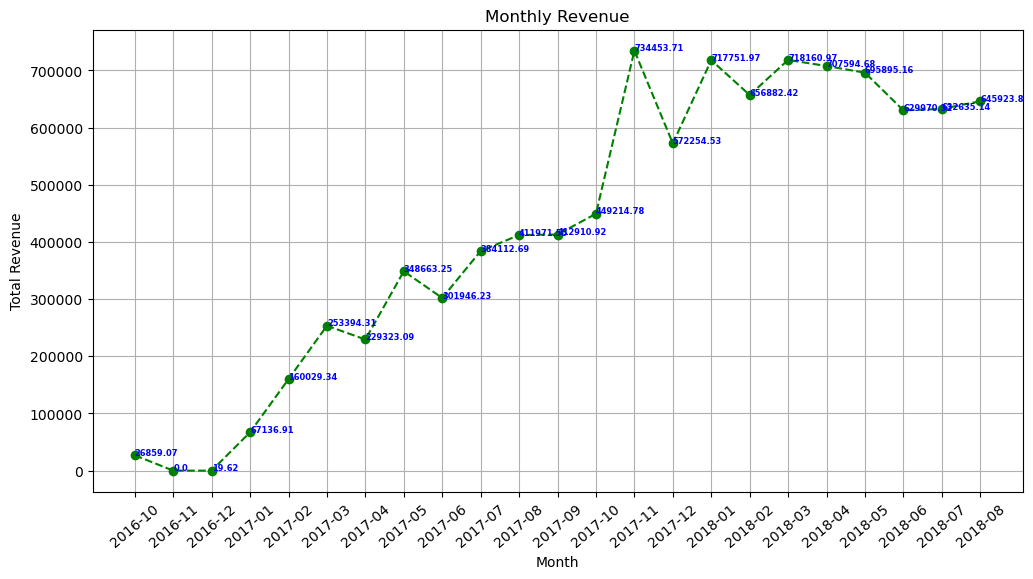

In [358]:
#Monthly Revenue
plt.figure(figsize=(5,3))
plt.plot(total_value_year_month.iloc[:,0],total_value_year_month.iloc[:,1], color = 'green', ls='--', marker='o' )
plt.gcf().set_size_inches(12,6)
for x, y in zip(total_value_year_month.iloc[:,0],total_value_year_month.iloc[:,1]):
    plt.text(x, y, str(y), color="blue", fontsize=6, fontweight = 'bold')
plt.xticks(rotation = 40)
plt.grid(True)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue')
plt.show()

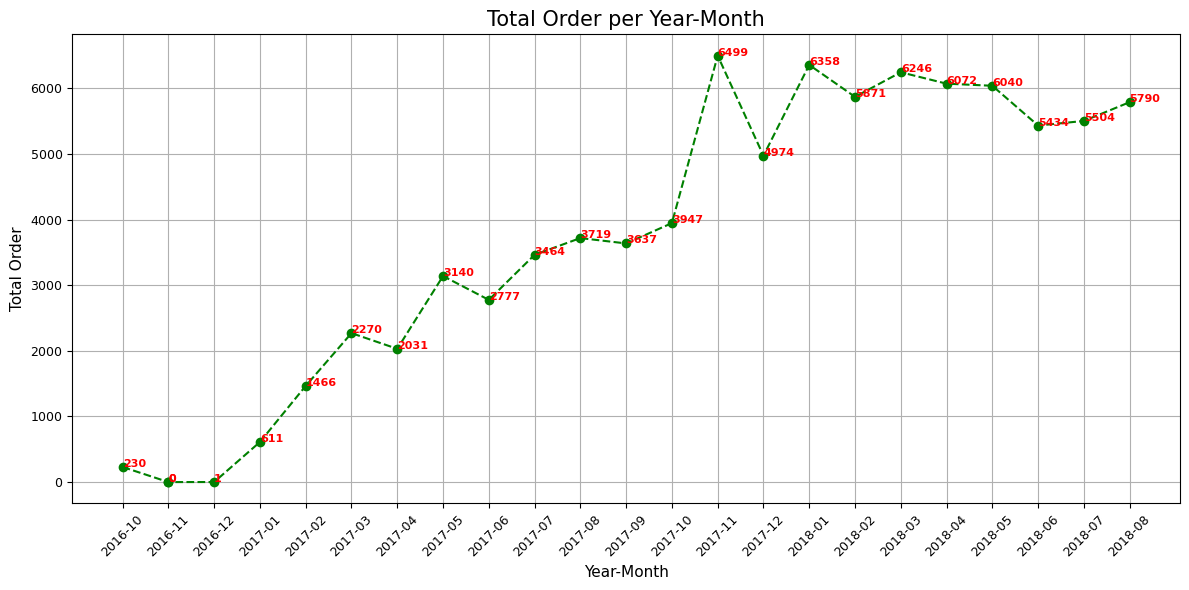

In [359]:
plt.figure(figsize=(8,6))
plt.title('Total Order per Year-Month', loc = 'center', fontsize= 15)
plt.xlabel('Year-Month', fontsize = 11)
plt.ylabel('Total Order', fontsize = 11)
plt.yticks(fontsize = 9)
plt.xticks(rotation= 45, fontsize = 9)
plt.plot(total_order_year_month.iloc[:,0],total_order_year_month.iloc[:,1], color = 'green', ls='--', marker='o' )
plt.gcf().set_size_inches(12,6)
for x, y in zip(total_order_year_month.iloc[:,0],total_order_year_month.iloc[:,1]):
    plt.text(x, y, str(y), color="red", fontsize=8, fontweight = 'bold')
plt.tight_layout()
plt.grid()
plt.show()

total order per bulan-tahun. Total order mengalami trend positif setiap bulannya dalam jangka 2016-201

In [360]:
total_order_year_month['growth_order'] = total_order_year_month.total_order.pct_change()
total_order_year_month['growth_order'] = total_order_year_month['growth_order'].fillna(0)


In [361]:
total_order_year_month.head(9)

,Year-Month_Order,total_order,growth_order
0,2016-10,230,0.000
1,2016-11,0,-1.000
2,2016-11,0,0.000
3,2016-12,1,inf
4,2017-01,611,610.000
5,2017-02,1466,1.399
6,2017-03,2270,0.548
7,2017-04,2031,-0.105
8,2017-05,3140,0.546


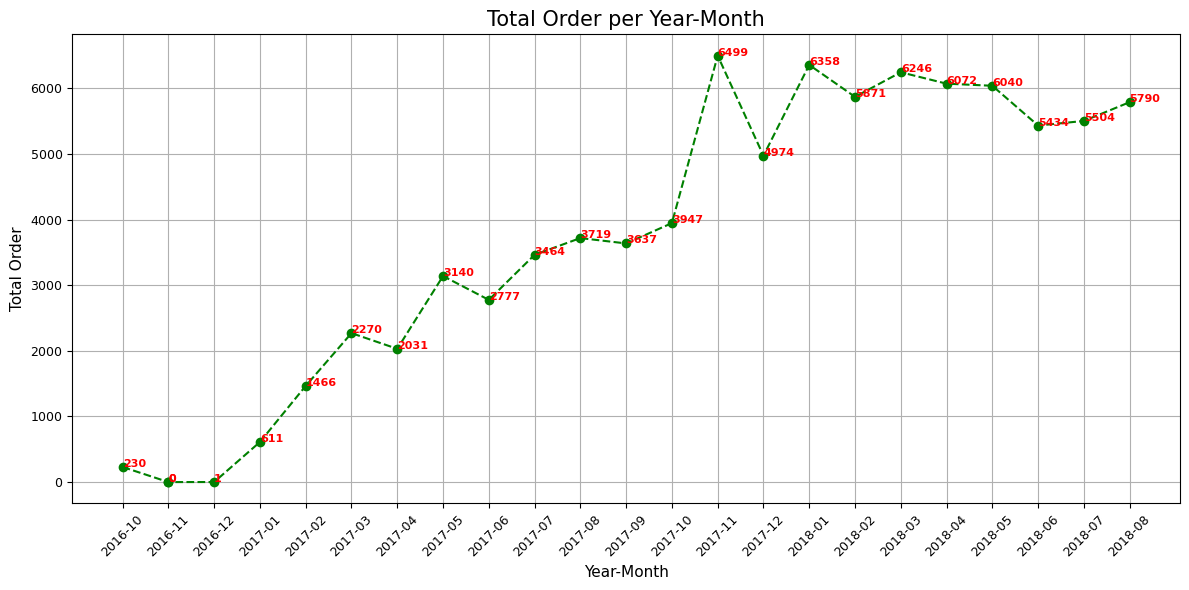

In [362]:
plt.figure(figsize=(8,6))
plt.title('Total Order per Year-Month', loc = 'center', fontsize= 15)
plt.xlabel('Year-Month', fontsize = 11)
plt.ylabel('Total Order', fontsize = 11)
plt.yticks(fontsize = 9)
plt.xticks(rotation= 45, fontsize = 9)
plt.plot(total_order_year_month.iloc[:,0],total_order_year_month.iloc[:,1], color = 'green', ls='--', marker='o' )
plt.gcf().set_size_inches(12,6)
for x, y in zip(total_order_year_month.iloc[:,0],total_order_year_month.iloc[:,1]):
    plt.text(x, y, str(y), color="red", fontsize=8, fontweight = 'bold')
plt.tight_layout()
plt.grid()
plt.show()

In [363]:
total_order_year_month.head(4)

,Year-Month_Order,total_order,growth_order
0,2016-10,230,0.000
1,2016-11,0,-1.000
2,2016-11,0,0.000
3,2016-12,1,inf


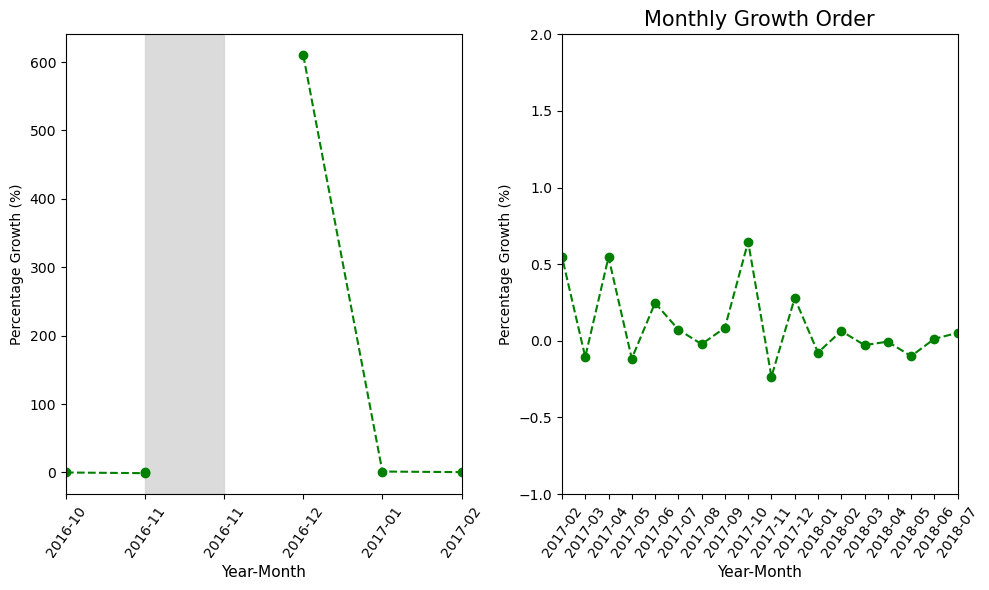

In [364]:
fig, ax = plt.subplots(1,2)
plt.title('Monthly Growth Order', loc = 'center', fontsize= 15)
ax[0].plot(total_order_year_month.iloc[:,0],total_order_year_month.iloc[:,2], color = 'green', ls='--', marker='o' )
ax[0].set_xlim(('2016-10','2017-03'))
ax[0].set_xlabel('Year-Month', fontsize = 11)
ax[0].set_xticklabels(total_order_year_month.iloc[:,0],rotation=55)
ax[0].set_ylabel('Percentage Growth (%)')
ax[0].axvspan('2016-11','2016-12', color='lightgray', alpha = 0.8)
ax[1].plot(total_order_year_month.iloc[:,0],total_order_year_month.iloc[:,2], color = 'green', ls='--', marker='o' )
ax[1].set_xlim(('2017-03','2018-08'))
ax[1].set_ylim((-1,2))
ax[1].set_ylabel('Percentage Growth (%)')
ax[1].set_xticklabels(total_order_year_month.iloc[:,0],rotation=55)
plt.gcf().set_size_inches(10,6)
ax[1].set_xlabel('Year-Month', fontsize = 11)
plt.tight_layout()
plt.show()

There is a gap between 2016-11 and 2016-12 because the store provided no data. Therefore, it seems like the store did not sell anything. $\\$

In 2016-12, the number of orders was one; the next month, the total order was 611. Hence the growth is very significant.
In 2016-12, the number of orders was one and in the next month total order was 611; hence the growth is very significant. $\\$
For the first month of 2017 until mid of 2018, the growth order could be considered stagnant (no significant growth) with the trend line constant in value of 0.5%.

In [365]:
df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,log_payment_value,Year-Month_Order,Year_Order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.000,credit_card,1.000,18.120,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,1.258,2017-10,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.000,boleto,1.000,141.460,af07308b275d755c9edb36a90c618231,Barreiras,BA,2.151,2018-07,2018


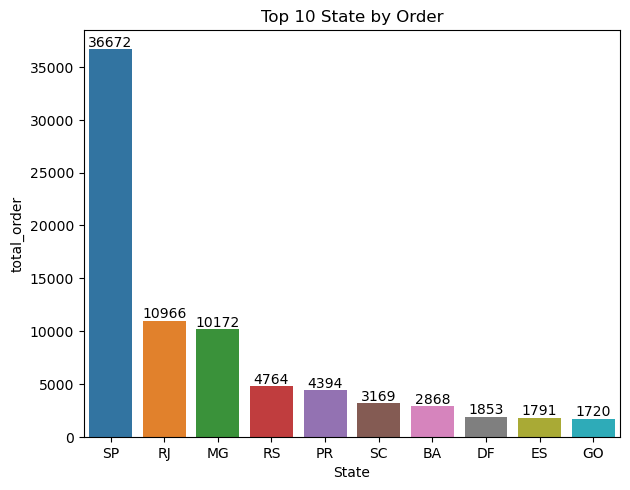

In [366]:
top_city = df.groupby(['customer_state'])['order_id'].agg('count').reset_index(name='total_order').sort_values(
    by = 'total_order', ascending = False
).head(10)
x = sns.barplot(x = 'customer_state', y = 'total_order', data=top_city)
for i in x.containers:
    x.bar_label(i,)
plt.tight_layout()
plt.title('Top 10 State by Order')
plt.xlabel('State')
plt.show()

In [367]:
payment_type = df['payment_type'].count()
total_payment_type = dict(100*(df['order_id'].groupby(df['payment_type']).count()/payment_type))
a = pd.DataFrame.from_dict([total_payment_type])
a

,boleto,credit_card,debit_card,voucher
0,20.222,75.386,1.585,2.808


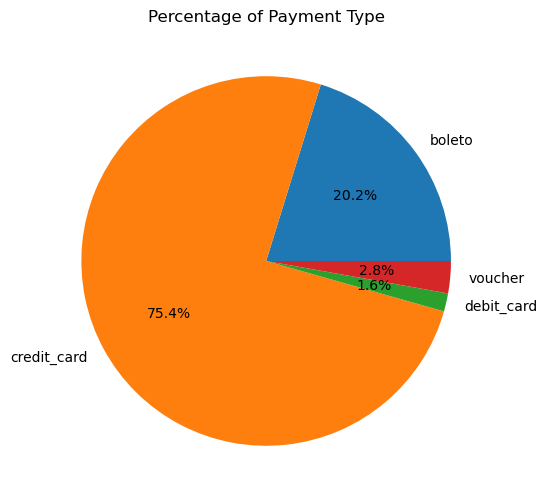

In [368]:
total_payment = df['payment_type'].count()
a = dict((df['order_id'].groupby(df['payment_type']).count()/total_payment)*100)
b = np.array(list(a.values()))
label = list(list(a.keys()))

plt.figure(figsize = (14,6))
plt.pie(b, labels = label, autopct='%1.1f%%')
plt.title('Percentage of Payment Type')
plt.show()

pemesan menyukai pembayaran melalui credit_card dan boleto.

In [369]:
def describe(column):
  if column.dtype == float or column.dtype == int :
    print(column.describe())
  elif column.dtype == object:
    print(column.describe())
  else:
    print(column.describe(datetime_is_numeric=True))
  return
  
for i,j in enumerate(df.columns):
  if df[j].dtype == float or df[j].dtype == int:
    print('___________________________________________________')
    print(f'{i+1}). Describe column {j} :')
    print('---------------------------------------------------')
    describe(df[j])
    print('===================================================')
  elif df[j].dtype == object:
    print('___________________________________________________')
    print(f'{i+1}). Describe column {j} :')
    print('---------------------------------------------------')
    describe(df[j])
    print('===================================================')
  else:
    print('___________________________________________________')
    print(f'{i+1}). Describe column {j} :')
    print('---------------------------------------------------')
    describe(df[j])
    print('===================================================')
#kolom untuk decriptive statistic yang dipakai payment_value.

___________________________________________________
1). Describe column order_id :
---------------------------------------------------
count                                86081
unique                               86081
top       e481f51cbdc54678b7cc49136f2d6af7
freq                                     1
Name: order_id, dtype: object
___________________________________________________
2). Describe column customer_id :
---------------------------------------------------
count                                86081
unique                               86081
top       9ef432eb6251297304e76186b10a928d
freq                                     1
Name: customer_id, dtype: object
___________________________________________________
3). Describe column order_status :
---------------------------------------------------
count         86081
unique            2
top       delivered
freq          86075
Name: order_status, dtype: object
___________________________________________________
4). Describe co

In [370]:
df.describe()

,payment_sequential,payment_installments,payment_value,log_payment_value
count,86081.000,86081.000,86081.000,86081.000
mean,1.024,2.677,113.348,1.960
std,0.237,2.465,72.406,0.308
min,1.000,0.000,0.010,-2.000
25%,1.000,1.000,57.230,1.758
50%,1.000,1.000,95.510,1.980
75%,1.000,4.000,154.040,2.188
max,19.000,24.000,347.000,2.540


## Korelasi antar Fitur

In [371]:
df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,log_payment_value,Year-Month_Order,Year_Order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.000,credit_card,1.000,18.120,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,1.258,2017-10,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.000,boleto,1.000,141.460,af07308b275d755c9edb36a90c618231,Barreiras,BA,2.151,2018-07,2018


In [372]:
data_adj1 = df.iloc[:,[8,9,10,11,14]]

In [373]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
scl = StandardScaler()
le = LabelEncoder()

In [374]:
data_adj1['payment_value_adj'] = scl.fit_transform(data_adj1.iloc[:,3].array.reshape(-1,1))

In [375]:
data_adj1['payment_type_adj'] = le.fit_transform(data_adj1[['payment_type']])

In [376]:
data_adj1['state_adj'] = le.fit_transform(data_adj1[['customer_state']])

In [377]:
data_adj1 = data_adj1.iloc[:,[0,2,5,6,7]]

In [378]:
data_adj1.head(3)

,payment_sequential,payment_installments,payment_value_adj,payment_type_adj,state_adj
0,1.000,1.000,-1.315,1,25
3,1.000,1.000,0.388,0,4
4,1.000,3.000,0.908,1,8


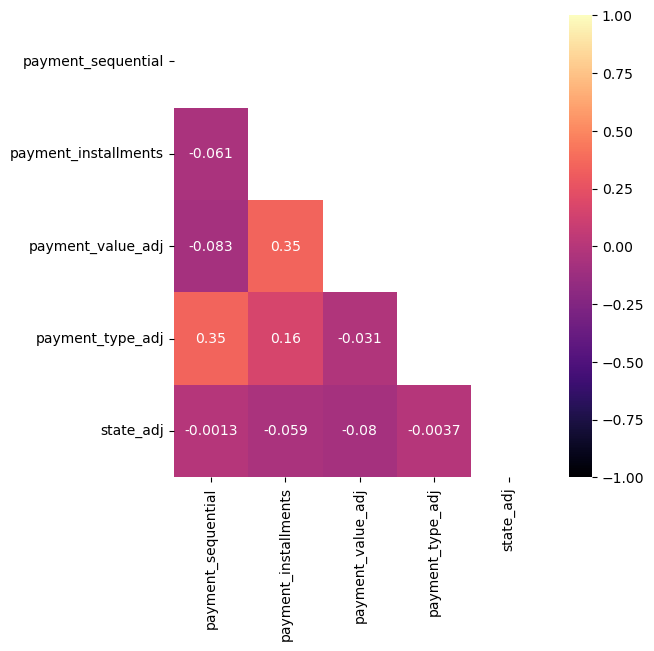

In [379]:
fig = plt.figure(figsize=(6,6))

mask = np.triu(np.ones_like(
    data_adj1.corr(), dtype=bool))
sns.heatmap(data_adj1.corr(),vmin=-1,
            vmax=1,cmap='magma',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

Ini menarik, hubungan antar fitur dapat dikatakan saling bebas.$\\$ 
Korelasi yang agak kuat dan positif terjadi antara payment_value dan payment_installments.
Korelasi sendiri diberikan sebagai: $\\$
$Cor(x,y) = \frac{1}{N}\sum_{i,j=1}^N(x_i -\mu_x)(y_i -\mu_y)$ dimana nilainya berada $[-1,1]$.

## Analisis Dengan Machine Learning


### K-means Clustering
Segmentation

In [380]:
data_adj = data_adj1.copy()

In [381]:
data_adj.head(3)

,payment_sequential,payment_installments,payment_value_adj,payment_type_adj,state_adj
0,1.000,1.000,-1.315,1,25
3,1.000,1.000,0.388,0,4
4,1.000,3.000,0.908,1,8


In [382]:
from sklearn.cluster import KMeans

In [383]:
cluster = KMeans()

In [384]:
identified_cluster = cluster.fit_predict(data_adj)
np.unique(identified_cluster)

array([0, 1, 2, 3, 4, 5, 6, 7])

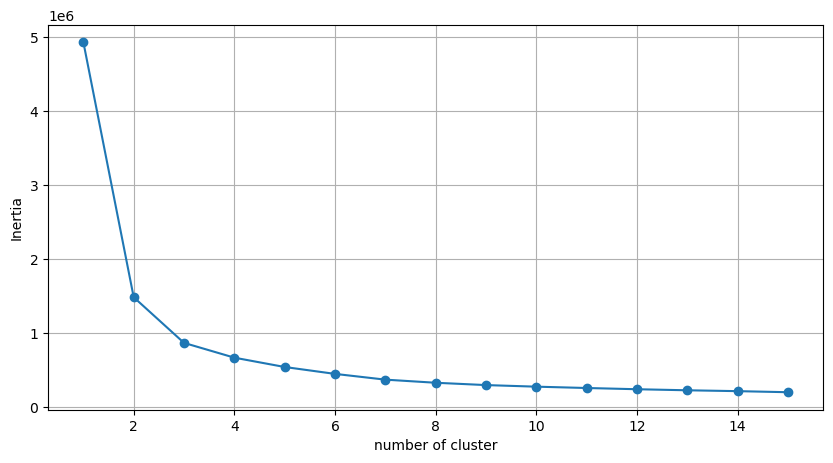

In [385]:
def optimise_k_means(data, max_k):
    means = []
    inertia = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertia.append(kmeans.inertia_)
    #elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertia, 'o-')
    plt.xlabel('number of cluster')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
optimise_k_means(data_adj, 16)

di n = 3 titik kritis dimana kurva inertia mulai konvergen.

In [386]:
cluster = KMeans(n_clusters=3)

In [387]:
cluster.fit(data_adj)

KMeans(n_clusters=3)

In [388]:
data_adj['payment_value'] = scl.inverse_transform(data_adj.payment_value_adj.array.reshape(-1,1))
data_adj['state'] =le.inverse_transform(data_adj.state_adj)
data_adj['state_name'] = df.customer_city
data_adj['order_id'] = df.order_id

In [389]:
data_adj['cluster']=cluster.labels_

In [390]:
data_adj.head(3)

,payment_sequential,payment_installments,payment_value_adj,payment_type_adj,state_adj,payment_value,state,state_name,order_id,cluster
0,1.000,1.000,-1.315,1,25,18.120,SP,Sao Paulo,e481f51cbdc54678b7cc49136f2d6af7,2
3,1.000,1.000,0.388,0,4,141.460,BA,Barreiras,53cdb2fc8bc7dce0b6741e2150273451,1
4,1.000,3.000,0.908,1,8,179.120,GO,Vianopolis,47770eb9100c2d0c44946d9cf07ec65d,1


In [391]:
data_adj['year_month'] = df['Year-Month_Order']

In [392]:
total_order_time = data_adj.groupby(['cluster','year_month'])['order_id'].agg('count').reset_index(name = 'Total_Order').sort_values(by='year_month')

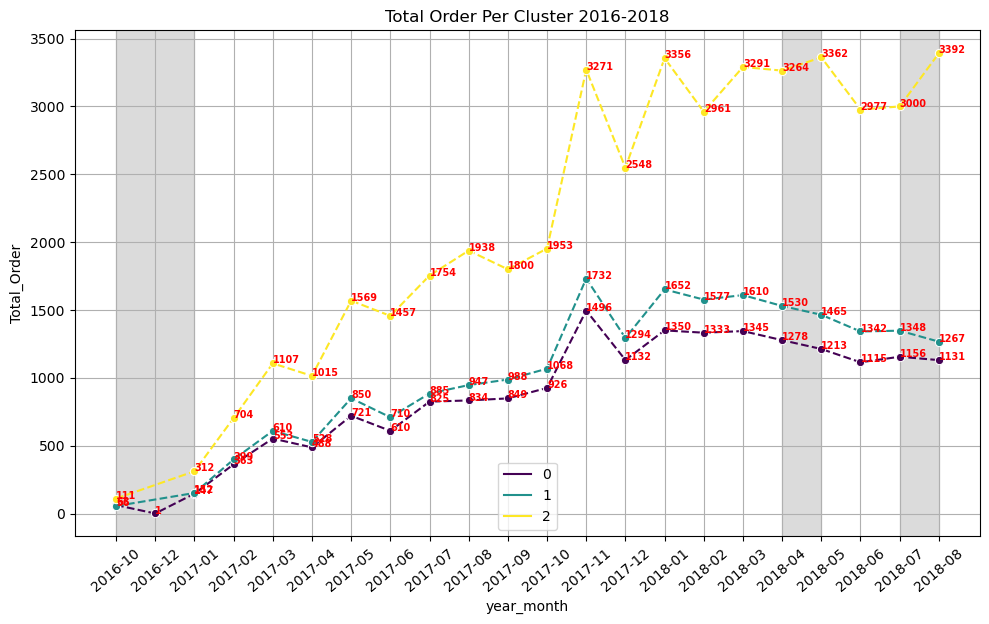

In [393]:
plt.figure(figsize=(10,6))
plt.title("Total Order Per Cluster 2016-2018")
total = sns.lineplot(x =total_order_time.year_month, y = total_order_time.Total_Order, 
hue =total_order_time.cluster, linestyle = '--', markers=True, marker='o', palette='viridis')
plt.axvspan('2018-04','2018-05', color='lightgray', alpha = 0.8)
plt.axvspan('2018-07','2018-08', color='lightgray', alpha = 0.8)
plt.axvspan('2016-10','2017-01', color='lightgray', alpha = 0.8)
for x, y in zip(total_order_time.year_month, total_order_time.Total_Order):
    plt.text(x, y, str(y), color="red", fontsize=7, fontweight = 'bold')
plt.tight_layout()
plt.grid(True)
plt.xticks(rotation= 40)
plt.legend(loc='best')
plt.show()

Total order perbulan dari 2016-2018 per masing-masing cluster: $\\$
Ketiga cluster secara umum memiliki tren yang hampir sama, namun cluster 2 memiliki total order terbesar tiap bulannya. $\\$
Di pertengahan tahun 2018, cluster 2 terlihat naik, tapi dua cluster lain tidak menunjukkan kenaikan.

In [394]:
#Projek berikutnya membuat modeling dengan metode numerik untuk mempelajari perilaku penjualan cluster.
#Pendekatan yg dilakukan adalah gerak terminal suatu benda dalam fluida, sehingga d^v/dt + kv^2/m = g.

In [395]:
avg_pay_time = data_adj.groupby(['cluster','year_month'])['payment_value'].agg('mean').reset_index(name = 'Avg_Payment').sort_values(by='year_month')

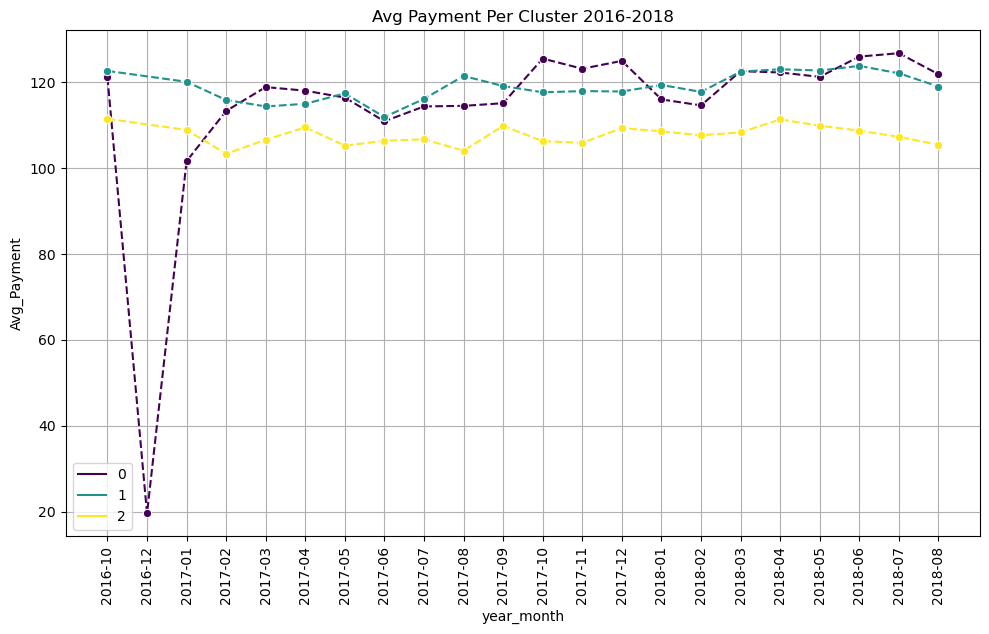

In [396]:
plt.figure(figsize=(10,6))
plt.title("Avg Payment Per Cluster 2016-2018")
total = sns.lineplot(x =avg_pay_time.year_month, y = avg_pay_time.Avg_Payment, 
hue =avg_pay_time.cluster, linestyle = '--', markers=True, marker='o', palette='viridis')
plt.tight_layout()
plt.grid(True)
plt.xticks(rotation= 90)
plt.legend(loc='best')
plt.show()

In [397]:
data_adj.groupby('cluster')[['payment_installments','payment_value']].describe()

payment_installments                                             \
                       count  mean   std   min   25%   50%   75%    max   
cluster                                                                   
0                  18929.000 2.848 2.587 1.000 1.000 2.000 4.000 24.000   
1                  22010.000 2.828 2.533 0.000 1.000 2.000 4.000 24.000   
2                  45142.000 2.531 2.367 0.000 1.000 1.000 3.000 24.000   

        payment_value                                                      
                count    mean    std   min    25%     50%     75%     max  
cluster                                                                    
0           18929.000 119.888 72.893 0.090 63.120 103.490 162.890 347.000  
1           22010.000 119.360 72.820 0.010 62.910 103.040 162.013 346.960  
2           45142.000 107.674 71.526 0.010 52.850  88.525 145.588 346.960

Payment value vs installment $\\$
- cluster 0: avg installment 3 dengan avg payment value 107  dan total order 451k $\\$
- cluster 1: avg installment 3 dengan avg payment value 119 dan total order 220k $\\$
- cluster 2: avg installment 2 dengan avg payment value 120 dan total order 189k $\\$

Meskipun cluster 1 dan 2 memiliki total order yang lebih kecil dari 0, tapi avg payment value mereka lebih besar. $\\$


### Interpretasi Cluster

Interpretasi cluster: $\\$
-  cluster 1 dan 2 : pemesan barang mahal. $\\$
-  cluster 0 : pemesan barang murah.

## Uji Hipotesis

### uji cluster 1 dan 2

Karena kita menginterpretasikan cluster 1 dan 2 sama. Kita akan melihat apakah 1 dan 2 terdapat perbedaan yang signifikan? $\\$
Untuk menjawab pertanyaan ini kita akan menggunakan metode tes hipotesis dengan dua populasi: populasi cluster 1 dan 2. $\\$
Sehingga, hipotesis kita adalah: $\\$
$H_0: \mu_2 - \mu_1 = 0$ $\\$ 
$H_1: \mu_2 \neq \mu_1$ $\\$ 
dimana $\mu$ merupakan mean populasi.

In [398]:
clus0 = data_adj[(data_adj['cluster']==0)].loc[:,['cluster','payment_value']]
clus1 = data_adj[(data_adj['cluster']==1)].loc[:,['cluster','payment_value']]
clus2 = data_adj[(data_adj['cluster']==2)].loc[:,['cluster','payment_value']]

In [399]:
#dimensi setiap cluster
print('Dimensi cluster 0 =', clus0.shape)
print('Dimensi cluster 1 =', clus1.shape)
print('Dimensi cluster 2 =', clus2.shape)

Dimensi cluster 0 = (18929, 2)
Dimensi cluster 1 = (22010, 2)
Dimensi cluster 2 = (45142, 2)


Kita tertarik menguji hipotesis secara statistik dengan significance level 5%.

In [400]:
#deksriptive statistik pada masing-masing cluster
data_adj.groupby('cluster')['payment_value'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,18929.000,119.888,72.893,0.090,63.120,103.490,162.890,347.000
1,22010.000,119.360,72.820,0.010,62.910,103.040,162.013,346.960
2,45142.000,107.674,71.526,0.010,52.850,88.525,145.588,346.960


standar deviasi sampel: $s =\sqrt{\frac{\sum_i^n (x_i - \bar{x})^2}{n-1}} $

In [401]:
#fungsi standar deviasi sampel berdasarkan definisi
def std_sampel(data):
    sigma = 0
    if len(data) == 0:
        print('tidak ada data')
        pass
    else:
        avg = data.mean()
        for i in data:
            sigma += (i - avg)**2
            std = np.sqrt(sigma/len(data)-1)
    std = float("{:.3f}".format(std))
    return std

In [402]:
#uji hipotesis
sampel_1 = clus1.iloc[:,1].sample(frac=0.2)
sampel_2 = clus1.iloc[:,1].sample(frac=0.2)

z-test pada dua populasi, $z = \frac{(\bar{x}_i - \bar{x}_j)-([H_0])}{\sqrt{\frac{s_i^2}{n_i}+\frac{s_i^2}{n_i}}}$

In [403]:
#z-test dua populasi
def z_test_twoPop(data1,data2):
    zeta = data1.mean() - data2.mean()
    omega = std_sampel(data1)**2/len(data1) + std_sampel(data2)**2/len(data2) 
    gamma = np.sqrt(omega)
    z = zeta/gamma
    if z < -1.645 or z > 1.645:
        print(f'Hipotesis H_0 ditolak!')
    else:
        print(f'Hipotesis H_0 gagal ditolak!')
    return


In [404]:
z_test_twoPop(sampel_1,sampel_2)

Hipotesis H_0 gagal ditolak!


Mengingat $H_0$ gagal ditolak, hipotesis kita bahwa cluster 1 dan 2 punya sifat yang sama diterima.

In [405]:
## Since clusters 1 and 2 have similar properties and are statistically identical significantly, we transform the value of 2 into 1
data_adj['cluster_transform'] = data_adj['cluster'].replace([2],1)

In [406]:
data_adj.head(1)

,payment_sequential,payment_installments,payment_value_adj,payment_type_adj,state_adj,payment_value,state,state_name,order_id,cluster,year_month,cluster_transform
0,1.000,1.000,-1.315,1,25,18.120,SP,Sao Paulo,e481f51cbdc54678b7cc49136f2d6af7,2,2017-10,1


### Uji signifikan revenue
Apakah cluster 0 tidak benar-benar memberikan revenue atau sebenarnya sama saja?

In [407]:
#gabung cluster 1 dan 2

cluster_tajir = pd.concat([clus1,clus2])

Hipotesis kita adalah: $\\$
$H_0: \mu_{tajir} - \mu_0 = 0$ $\\$ 
$H_1: \mu_{tajir} > \mu_0$ $\\$ 
dimana $\mu$ merupakan mean populasi.

In [408]:
sampel_tajir = cluster_tajir.iloc[:,1].sample(frac=0.2,random_state=8)
sampel0 = clus0.iloc[:,1].sample(frac=0.2,random_state=8)

In [409]:
z_test_twoPop(sampel_tajir,sampel0)

Hipotesis H_0 ditolak!


In [410]:
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [411]:
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,log_payment_value,Year-Month_Order,Year_Order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.000,credit_card,1.000,18.120,7c396fd4830fd04220f754e42b4e5bff,Sao Paulo,SP,1.258,2017-10,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.000,boleto,1.000,141.460,af07308b275d755c9edb36a90c618231,Barreiras,BA,2.151,2018-07,2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.000,credit_card,3.000,179.120,3a653a41f6f9fc3d2a113cf8398680e8,Vianopolis,GO,2.253,2018-08,2018


Hipotesis $H_0$ ditolak, cluster tajir memberikan revenue yang signifikan terbukti dengan level confidence 95%.

In [413]:
clust1_full = data_adj[(data_adj['cluster_transform']==1 )]
clust0_full = data_adj[data_adj['cluster_transform']==0]

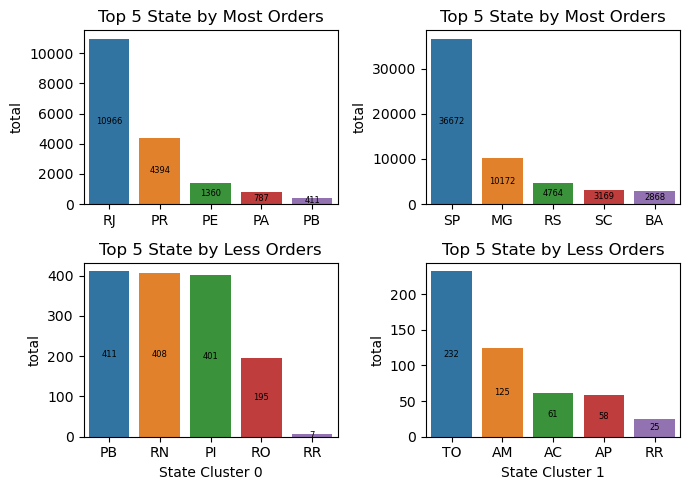

In [414]:
fig, ax = plt.subplots(2,2, figsize=(7,5))
murah = sns.barplot(x = 'state',y= 'total', data = clust0_full.groupby(['state'])['order_id'].agg('count').reset_index(name= 'total').sort_values(by='total', ascending=False).head(5), 
                        ax=ax[0,0])
murah_terendah = sns.barplot(x = 'state',y= 'total', data = clust0_full.groupby(['state'])['order_id'].agg('count').reset_index(name= 'total').sort_values(by='total', ascending=False).tail(5), 
                        ax=ax[1,0])
mahal_terendah = sns.barplot(x = 'state',y= 'total', 
data = clust1_full.groupby(['state'])['order_id'].agg('count').reset_index(name= 'total').sort_values(by='total', 
ascending=False).tail(5),ax=ax[1,1])
mahal = sns.barplot(x = 'state',y= 'total', 
data = clust1_full.groupby(['state'])['order_id'].agg('count').reset_index(name= 'total').sort_values(by='total', 
ascending=False).head(5),ax=ax[0,1])
a = [murah, mahal, murah_terendah,mahal_terendah]
for j in a:
    for i in j.containers:
        j.bar_label(i,size = 6,label_type='center')

ax[0,0].set_title('Top 5 State by Most Orders')
ax[0,1].set_title('Top 5 State by Most Orders')
ax[1,0].set_title('Top 5 State by Less Orders')
ax[1,1].set_title('Top 5 State by Less Orders')
ax[0,0].set(xlabel=None)
ax[0,1].set(xlabel=None)
ax[1,0].set_xlabel('State Cluster 0')
ax[1,1].set_xlabel('State Cluster 1')
plt.tight_layout()
plt.show()

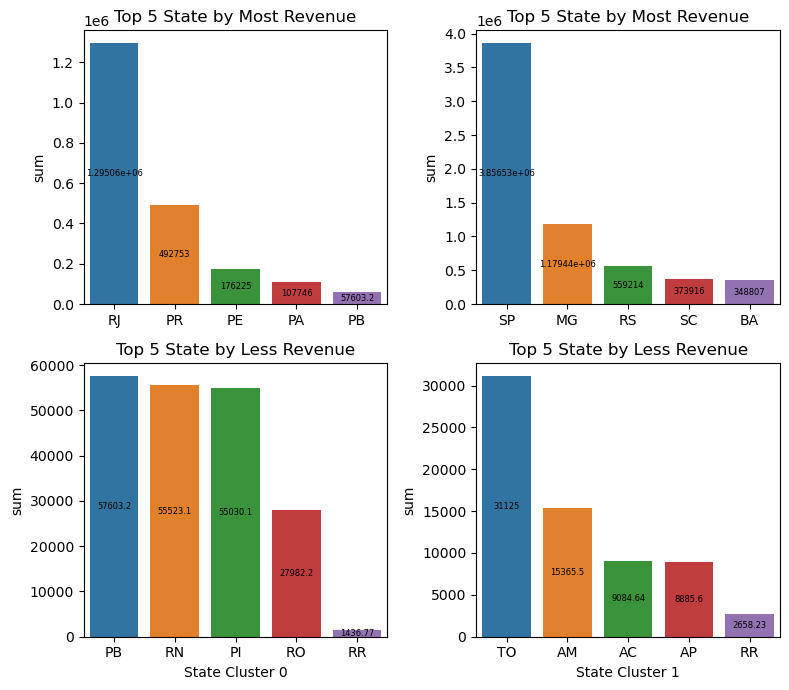

In [415]:
fig, ax = plt.subplots(2,2, figsize=(8,7))
murah = sns.barplot(x = 'state',y= 'sum', data = clust0_full.groupby(['state'])['payment_value'].agg('sum').reset_index(name= 'sum').sort_values(by='sum', ascending=False).head(5), 
                        ax=ax[0,0])
murah_terendah = sns.barplot(x = 'state',y= 'sum', data = clust0_full.groupby(['state'])['payment_value'].agg('sum').reset_index(name='sum').sort_values(by='sum', ascending=False).tail(5), 
                        ax=ax[1,0])
mahal_terendah = sns.barplot(x = 'state',y= 'sum', 
data = clust1_full.groupby(['state'])['payment_value'].agg('sum').reset_index(name= 'sum').sort_values(by='sum', 
ascending=False).tail(5),ax=ax[1,1])
mahal = sns.barplot(x = 'state',y= 'sum', 
data = clust1_full.groupby(['state'])['payment_value'].agg('sum').reset_index(name= 'sum').sort_values(by='sum', 
ascending=False).head(5),ax=ax[0,1])
a = [murah, mahal, murah_terendah,mahal_terendah]
for j in a:
    for i in j.containers:
        j.bar_label(i,size = 6,label_type='center')

ax[0,0].set_title('Top 5 State by Most Revenue')
ax[0,1].set_title('Top 5 State by Most Revenue')
ax[1,0].set_title('Top 5 State by Less Revenue')
ax[1,1].set_title('Top 5 State by Less Revenue')
ax[0,0].set(xlabel=None)
ax[0,1].set(xlabel=None)
ax[1,0].set_xlabel('State Cluster 0')
ax[1,1].set_xlabel('State Cluster 1')
plt.tight_layout()
plt.show()

## Summary 

- Terdapat dua cluster: 1) pemesan barang mewah (cluster 1); 2) pemesan barang yang murah (cluster 0).
- pemesan barang mewah umumnya menggunakan metode pembayaran kartu kredit.
- Cluster 1 secara statistik memberikan revenue yang lebih besar
- Secara umum, persentase penggunaan kartu kredit terbesar sebagai metode pembayaran; sementara $\\$
  penggunaan voucher dan debit terendah.
- Total penjualan barang mewah < total penjualan barang murah.
- Revenue selalu naik setiap tahun
- Total revenue tiap bulan selalu mengalami kenaikan, namun di semester I 2018  mengalami stagnansi
- Tren total order mengikuti trend revenue
- SP merupakan state pemesan barang mewah terbanyak, sementara RJ pemesan barang murah terbanyak
- RR state terendah dalam hal pemesanan barang murah atau mahal, sehingga merupakan state dengan revenue terendah.
- Lima state terendah pemesan barang mewah memiliki besar total order dan revenue terendah dari lima state terendah pemesan barang murah.

## Rekomendasi

Beberapa strategi yang bisa dilakukan untuk meningkatkan Revenue dan growth order:
- Tingkatkan brand awarenes dari masing-masing produk dengan cara memberikan sponsorship pada event lokal.
- Meningkatkan local marketing 
- Berikan variasi produk yang lebih beragam dengan metode pembayaran yang bisa dilakukan oleh target market + promo voucher